In [1]:
# mostly copied from https://github.com/mirianfsilva/lorenz-attractor-chaos-theory

import math, sys 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
#from matplotlib import animation

from abstract_defs import *

In [10]:
rho = 28
sigma = 10
beta = 8/3

rhom1 = rho-1
xp = np.sqrt(beta*rhom1)

#def f_lorenz(t, x_vec):
#    (x, y, z) = x_vec[0:3]
#    x_dot = np.array([sigma * (-x + y),
#                x * (rho - z) - y,
#                x * y - beta * z]) 
#    return x_dot

px1 = np.array([-sigma, sigma, 0])
poly_x = Polynomial([0, px1])
py1 = np.array([rho, -1, 0])
py2 = np.array([[0, 0, -1],
                [0, 0, 0],
                [0, 0, 0]])
poly_y = Polynomial([0, py1, py2])
pz1 = np.array([0, 0, -beta])
pz2 = np.array([[0, 1, 0], 
                [0, 0, 0], 
                [0, 0, 0]])
poly_z = Polynomial([0, pz1, pz2])
f_lorenz = VectorPolynomial([poly_x, poly_y, poly_z])
                      
def fixed_points():
    fp0 = np.array([0, 0, 0])
    fp1 = np.array([xp, xp, rhom1])
    fp2 = np.array([-xp, -xp, rhom1])
    return np.vstack([fp0, fp1, fp2])

fps = fixed_points()

poly_p1_x = poly_x
poly_p2_x = poly_x

pyp1_1 = np.array([1, -1, xp])
pyp2_1 = np.array([1, -1, -xp])
pyp1_2 = py2
pyp2_2 = py2
poly_p1_y = Polynomial([0, pyp1_1, pyp1_2])
poly_p2_y = Polynomial([0, pyp2_1, pyp2_2])

pzp1_1 = np.array([xp, xp, -beta])
pzp2_1 = np.array([-xp, -xp, -beta])
pzp1_2 = pz2
pzp2_2 = pz2
poly_p1_z = Polynomial([0, pzp1_1, pzp1_2])
poly_p2_z = Polynomial([0, pzp2_1, pzp2_2])

fp1_lorenz = VectorPolynomial([poly_p1_x, poly_p1_y, poly_p1_z])
fp2_lorenz = VectorPolynomial([poly_p2_x, poly_p2_y, poly_p2_z])

#print(fp1_lorenz)
#print(fp2_lorenz)

In [3]:
(xsize, ysize) = (8.5, 8.5)

# choose a different color for each trajectory
#colors = plt.cm.viridis(np.linspace(0, 1, 10))
def lorenz_ode_plot_components(bunch):
    t = bunch.t
    x, y, z = bunch.y[0:3, :]
    plt.figure(figsize=(xsize, ysize))
    plt.plot(t, x, linewidth = 1, color = 'b') 
    plt.plot(t, y, linewidth = 1, color = 'r')
    plt.plot(t, z, linewidth = 1, color = 'g')
    plt.grid (True)
    plt.xlabel('t')
    plt.ylabel('x(t), y(t), z(t)')
    plt.title('Lorenz Time Series Plot')
    
    plt.legend(['x','y','z'], loc = 2)
    #plt.savefig('lorenz_ode_components.png')
    plt.show()
    return 

def lorenz_ode_plot_3d(bunch, fps):
    t = bunch.t
    x, y, z = bunch.y[0:3, :]
    ax = plt.figure(figsize = (xsize, ysize)).add_subplot(projection='3d')
    ax.plot(x, y, z, linewidth = 0.5, color = 'r')
    ax.plot(fps[:, 0], fps[:, 0], fps[:, 2], 'go')   
    ax.grid(True)
    ax.set_xlabel('x(t)')
    ax.set_ylabel('y(t)')
    ax.set_zlabel('z(t)')
    ax.set_title ('Lorenz 3D Plot' )
    
    #plt.savefig('lorenz_ode_3d.png')
    plt.show()
    return

In [4]:
max_T = 100
npoints = max_T*100+1
t_eval = np.linspace(0, max_T, npoints)
x0 = (8, 1, 1)
sol = integrate.solve_ivp(f_lorenz, (0, max_T), x0, method='RK45', t_eval=t_eval, atol=1e-10)

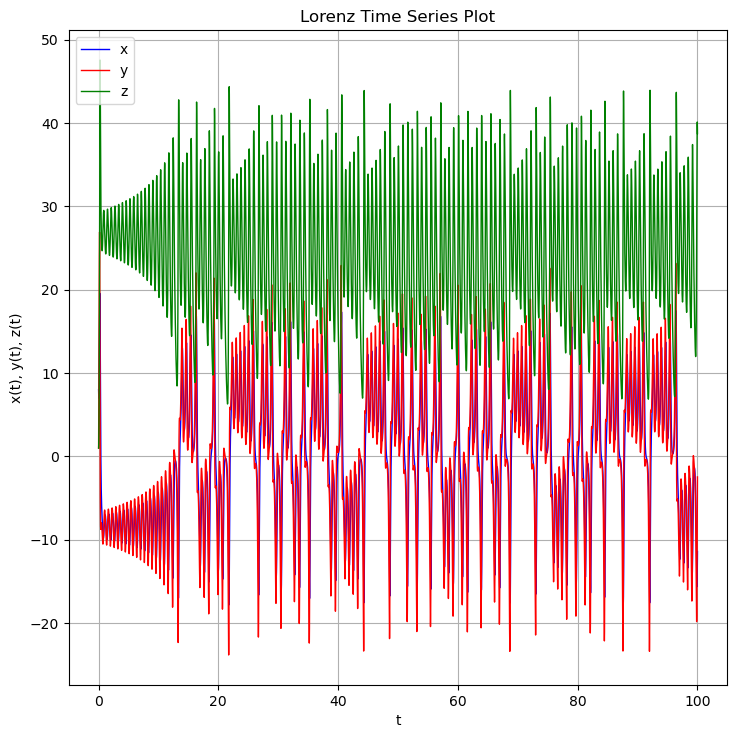

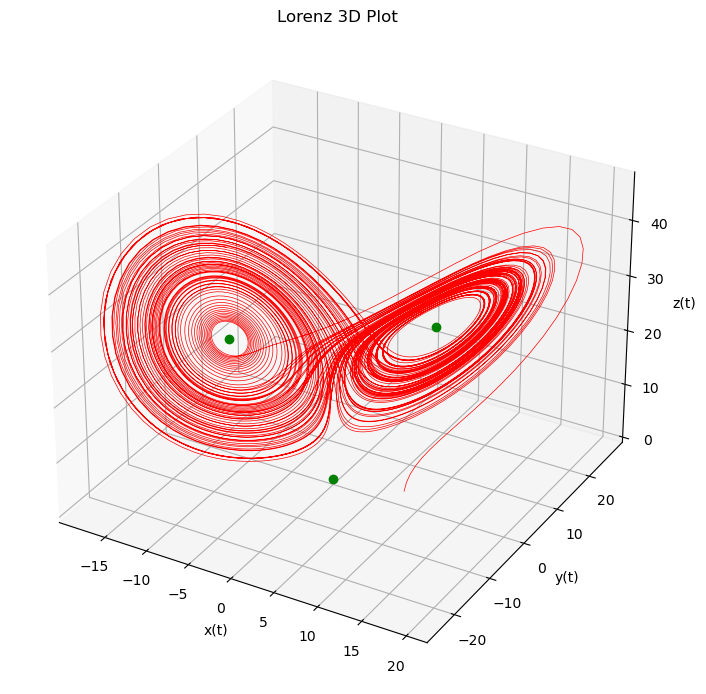

[0.000e+00 1.000e-02 2.000e-02 ... 9.998e+01 9.999e+01 1.000e+02]


In [5]:
lorenz_ode_plot_components(sol)
lorenz_ode_plot_3d(sol, fps)
print(sol['t'])